In [31]:
#IST 718_Final Project_Global Temperature Rise _Climate change Impact
# Data sets are obtained from Kaggle and data world
# Basic idea is explore the data 
# Clean the data  and combine the data by joining the two different data files
# Time Series Analysis - ARIMA, XARIMA, RF 
# SVM's if possible
# Some better and informative visualizations
# Over all data measures, predictions and issues and other Data Model with "OSEMIN" and "7'C's" ; 

################################REFERENCES ######################
## Also referred the following iterative approach of ploting ggplots in python
## https://mesfind.github.io/python-ecology-lesson/06-visualization-ggplot-python/
##https://climate--change--global.herokuapp.com/

##############################################################
## QUESTIONS THAT ARE ANSWERED IN THIS NOTE BOOK ARE ##
# 1. Is there any change or trend in the Average Temperature change since 1850 across the continents
#Ans : YES,the note book has a plot which depicts the changes across the regions (continents)
#2. The top 5 hottest  countries
#3. The top 5 coldest countries
#4. The coldest country of the last 2 decades
#5. The hottest country of the last 2 decades

In [60]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline         

import datetime
import copy
# Plotly to work on jupyter notebook
# installation from conda "$ conda install -c plotly plotly=5.10.0"

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

In [61]:
#Load the temperature dataset of cities across world
## Considering another data set from repository 
# Read the data
CYT = pd.read_csv("C:/Users/praso/Documents/IST 718 Big Data Analytics/IST 718_FINAL PROJECT/CT2.csv")

#CYT = pd.read_csv('GTCY.csv')
#header=0, index_col=0, parse_dates=True, squeeze=True)
#CYTdata.dropna(inplace = True)
#CYTdata.head()
#print(CYTdata.shape) # Get the size of data in terms of rows and colums
#print(CYTdata.info)

C:\Users\praso\AppData\Local\Temp\ipykernel_14124\2967854949.py:4: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [62]:
CYT.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [63]:
CYT = CYT.drop_duplicates()
CYT.isnull().sum()
## It is expected to have duplicates as cities might have multiple entries for different dates

Region                  0
Country                 0
State             1448805
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

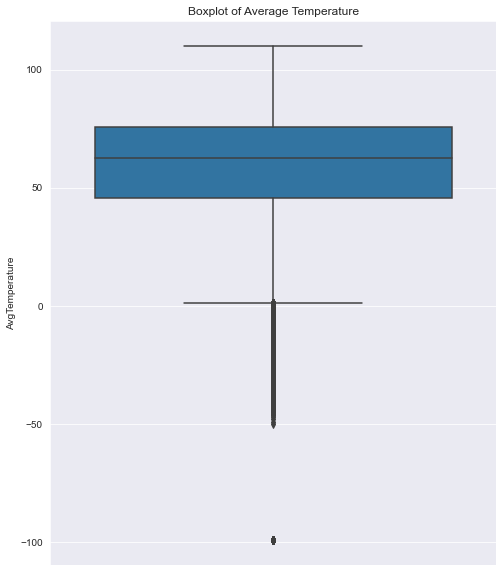

In [64]:
plt.figure(figsize = (8,10))
sns.boxplot(data = CYT,y = 'AvgTemperature')
_=plt.title("Boxplot of Average Temperature")

In [65]:
### Monthly temperatures
CYT.sort_values(['Year','Month','Day'])

,Region,Country,State,City,Month,Day,Year,AvgTemperature
845909,Europe,Norway,NaN,Oslo,12,1,200,-99.0
845910,Europe,Norway,NaN,Oslo,12,2,200,-99.0
743367,Europe,Germany,NaN,Hamburg,12,3,200,-99.0
845911,Europe,Norway,NaN,Oslo,12,3,200,-99.0
743368,Europe,Germany,NaN,Hamburg,12,4,200,-99.0
...,...,...,...,...,...,...,...,...
2862479,North America,US,Wisconsin,Green Bay,5,13,2020,38.5
2871744,North America,US,Wisconsin,Madison,5,13,2020,45.7
2881009,North America,US,Wisconsin,Milwaukee,5,13,2020,41.2
2890274,North America,US,Wyoming,Casper,5,13,2020,54.1


In [66]:
#There are lot of zeros since 2020
CYT = CYT[CYT['AvgTemperature']>-70]

CYT = CYT[CYT['Year']<2020]

data = CYT[['Year','AvgTemperature']].groupby('Year').mean()
linfit = np.polyfit(data.index,data['AvgTemperature'],deg=1)
linfit = linfit[0]*data.index + linfit[1]

fig = px.line(data,title='Average Temperature of the World from')
fig.add_trace(go.Scatter(x=data.index,y=linfit,name='Linear Fit'))

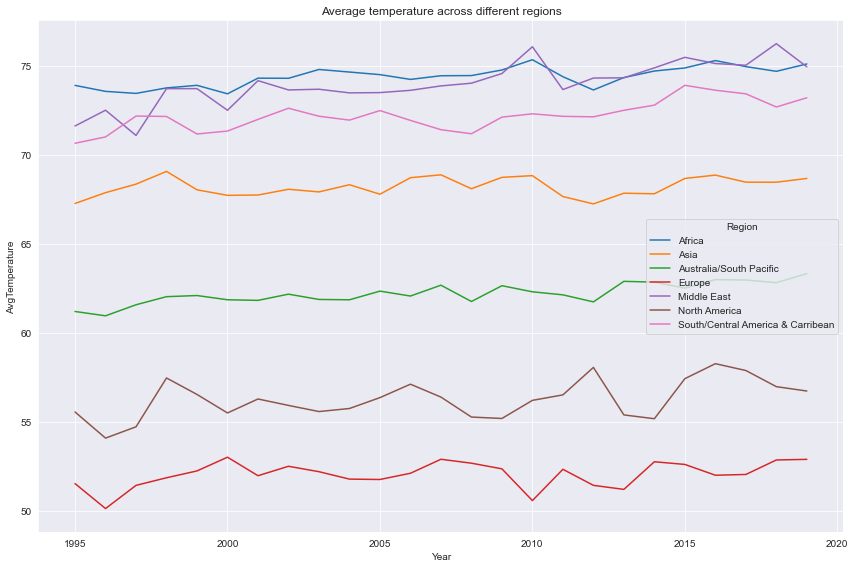

In [67]:
data = CYT[['Region','AvgTemperature','Year']].groupby(['Region','Year']).mean()
data = data.reset_index(level=0)

#plotting
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(data=data,hue='Region',x='Year',y='AvgTemperature')
_=plt.title('Average temperature across different regions')
plt.tight_layout()

In [68]:
data1=CYT.sort_values(by=['AvgTemperature'],ascending=False).head(1)
data2=CYT.sort_values(by=['AvgTemperature'],ascending=True).head(1)
data = pd.concat([data1,data2],)
data.index = ['Highest','Lowest']
data

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Highest,Middle East,Kuwait,NaN,Kuwait,8,1,2012,110.0
Lowest,North America,US,Alaska,Fairbanks,12,31,1999,-50.0


In [69]:
data =CYT[['Country','AvgTemperature']].groupby('Country').mean().sort_values('AvgTemperature')
print('The top five coldest countries in the world are: ',data.index[:5].to_list())
print('The top five hottest countries in the world are: ',data.index[-5:].to_list())

The top five coldest countries in the world are:  ['Mongolia', 'Iceland', 'Norway', 'Canada', 'Finland']
The top five hottest countries in the world are:  ['Guyana', 'Indonesia', 'Thailand', 'Nigeria', 'Haiti']


In [70]:
data = CYT[['Country','Year','AvgTemperature']].groupby(['Year','Country']).mean().sort_values('AvgTemperature').reset_index()
data = data.groupby('Year').apply(lambda group: group.iloc[:5]).reset_index(drop=True)
px.choropleth(data_frame=data,locationmode='country names',locations='Country',color='AvgTemperature',animation_frame='Year',title="Top five coldest countries over the years")